In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import numpy as np
import tensorflow as tf
import keras as k
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential
from keras.datasets import imdb

ModuleNotFoundError: No module named 'keras'

In [4]:
max_words = 20000 # how many review we want to load

print('Loading the data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print(len(x_train))
print(len(y_train))


Loading the data...


NameError: name 'imdb' is not defined

In [0]:
# pre-processing
max_review_length = 80 # lengttth of every reviews

x_train = k.preprocessing.sequence.pad_sequences(x_train, truncating='pre', padding='pre', maxlen=max_review_length)
x_test = k.preprocessing.sequence.pad_sequences(x_test, truncating='pre', padding='pre', maxlen=max_review_length)

print(x_train.shape)
print(x_test.shape)

(25000, 80)
(25000, 80)


In [0]:
# build the model
embedding_length = 64
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_length, input_length=max_review_length,
                    mask_zero = True, name = 'embadding_layer'))
model.add(LSTM(units=64, input_shape=(max_review_length, embedding_length), return_sequences=False,
               unroll=True, name = 'LSTM_layer'))
model.add(Dense(units=1, activation = 'sigmoid', name = 'dense_sigmoid_layer'))

# compile
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embadding_layer (Embedding)  (None, 80, 64)            1280000   
_________________________________________________________________
LSTM_layer (LSTM)            (None, 64)                33024     
_________________________________________________________________
dense_sigmoid_layer (Dense)  (None, 1)                 65        
Total params: 1,313,089
Trainable params: 1,313,089
Non-trainable params: 0
_________________________________________________________________


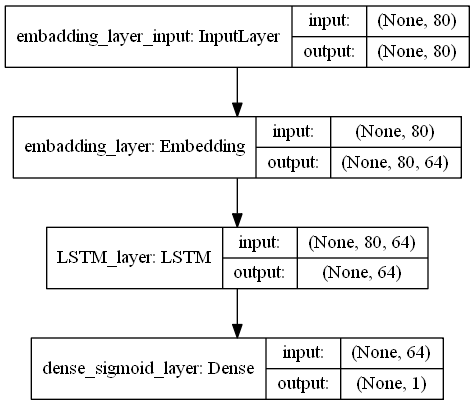

In [0]:
#viisulize
model.summary()

from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='sentiment_keras_lstm.png')

In [0]:
# train the model
batch_size=32

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/100
25000/25000 [==============================] - 102s 4ms/step - loss: 0.0138 - accuracy: 0.9963 - val_loss: 0.8779 - val_accuracy: 0.8030
Epoch 2/100
25000/25000 [==============================] - 101s 4ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 1.0575 - val_accuracy: 0.8159
Epoch 3/100
25000/25000 [==============================] - 102s 4ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 1.0790 - val_accuracy: 0.8126
Epoch 4/100
25000/25000 [==============================] - 101s 4ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 1.1945 - val_accuracy: 0.8125
Epoch 5/100
25000/25000 [==============================] - 102s 4ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 1.2063 - val_accuracy: 0.8125
Epoch 6/100
25000/25000 [==============================] - 102s 4ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 1.1029 - val_accuracy: 0.8069
Epoch 7/100
25000/25000 [==============================]

KeyboardInterrupt: 

In [0]:
# validate
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score = {score}')
print(f'Test accuracy = {acc}')
